In [106]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Môi trường không tương thích, không nên chạy lệnh trên!

In [107]:
import os
from fastbook import *
fastbook.setup_book()

from fastai.vision.utils import download_images, get_image_files
from fastai.vision.all import *
from fastdownload import download_url
from duckduckgo_search import DDGS
from PIL import Image
from pathlib import Path

Clean: Microsoft Azure 

In [108]:
def search_images(term, max_results=150):
    with DDGS() as ddgs:
        results = ddgs.images(keywords=term, max_results=max_results)
        urls = [r["image"] for r in results]
        return [url for url in urls if url.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Thử nghiệm:
urls = search_images("grizzly bear", max_results=5)
for url in urls:
    print(url)


https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg
https://thelatebloomerhiker.files.wordpress.com/2014/11/grizzly-bear-22224-1920x1200.jpg
https://www.earthrangers.com/public/content/wildwire/GrizzlyBearJeanBeaufort.jpeg
https://cdn.britannica.com/18/161718-050-2DB34DD6/Grizzly-bear.jpg
https://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg


In [109]:
ims = search_images("grizzly bear", max_results=5)
print(ims[0])

https://cdn.britannica.com/18/161718-050-2DB34DD6/Grizzly-bear.jpg


In [110]:
from fastdownload import download_url
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

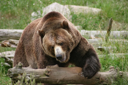

In [111]:
im = Image.open(dest)
im.to_thumb(128,128)

In [112]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = path/o
        dest.mkdir(exist_ok=True)
        results = search_images(f'{o} bear', max_results=150)  
        print(f"Found {len(results)} URLs for {o} bear")
        download_images(dest, urls=results)

In [113]:
path = untar_data(URLs.PETS)/'images'
fns = get_image_files(path)
print(f"Tổng số ảnh: {len(fns)}")  
failed = verify_images(fns)
failed.map(Path.unlink)
print(f"Tổng số ảnh hợp lệ: {len(get_image_files(path))}")

Tổng số ảnh: 7390
Tổng số ảnh hợp lệ: 7390


In [114]:
import shutil

new_path = Path('bears')
new_path.mkdir(exist_ok=True)

breeds = {'Abyssinian': 'grizzly', 'Ragdoll': 'black', 'Maine_Coon': 'teddy'}

for breed, new_label in breeds.items():
    dest = new_path/new_label
    dest.mkdir(exist_ok=True)
    breed_files = [f for f in fns if f.name.startswith(breed)]
    for i, f in enumerate(breed_files[:150]):  
        shutil.copy(f, dest/f'image_{i}.jpg')
        print(f"Copied {f} to {dest/f'image_{i}.jpg'}")

fns = get_image_files(new_path)
print(f"Tổng số ảnh tải về: {len(fns)}")
failed = verify_images(fns)
failed.map(Path.unlink)
print(f"Tổng số ảnh hợp lệ: {len(get_image_files(new_path))}")

Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_1.jpg to bears\grizzly\image_0.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_10.jpg to bears\grizzly\image_1.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_100.jpg to bears\grizzly\image_2.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_101.jpg to bears\grizzly\image_3.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_102.jpg to bears\grizzly\image_4.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_103.jpg to bears\grizzly\image_5.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_104.jpg to bears\grizzly\image_6.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_105.jpg to bears\grizzly\image_7.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pet\images\Abyssinian_106.jpg to bears\grizzly\image_8.jpg
Copied C:\Users\doy27\.fastai\data\oxford-iiit-pe

In [115]:
fns = get_image_files(new_path)
fns

(#901) [Path('bears/black/image_0.jpg'),Path('bears/black/image_1.jpg'),Path('bears/black/image_10.jpg'),Path('bears/black/image_100.jpg'),Path('bears/black/image_101.jpg'),Path('bears/black/image_102.jpg'),Path('bears/black/image_103.jpg'),Path('bears/black/image_104.jpg'),Path('bears/black/image_105.jpg'),Path('bears/black/image_106.jpg'),Path('bears/black/image_107.jpg'),Path('bears/black/image_108.jpg'),Path('bears/black/image_109.jpg'),Path('bears/black/image_11.jpg'),Path('bears/black/image_110.jpg'),Path('bears/black/image_111.jpg'),Path('bears/black/image_112.jpg'),Path('bears/black/image_113.jpg'),Path('bears/black/image_114.jpg'),Path('bears/black/image_115.jpg')...]

In [116]:
failed = verify_images(fns)
failed

(#0) []

In [117]:
failed.map(Path.unlink);

In [131]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [132]:
dls = bears.dataloaders(new_path)

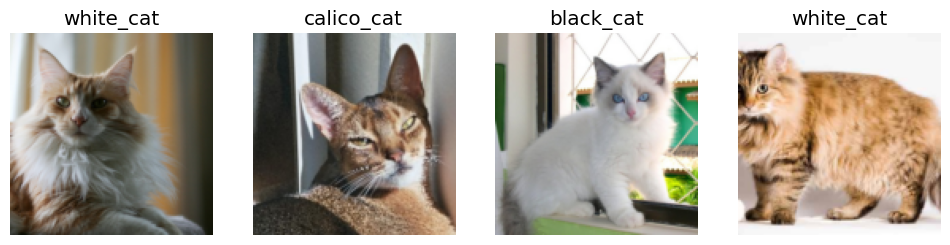

In [133]:
dls.valid.show_batch(max_n=4, nrows=1)

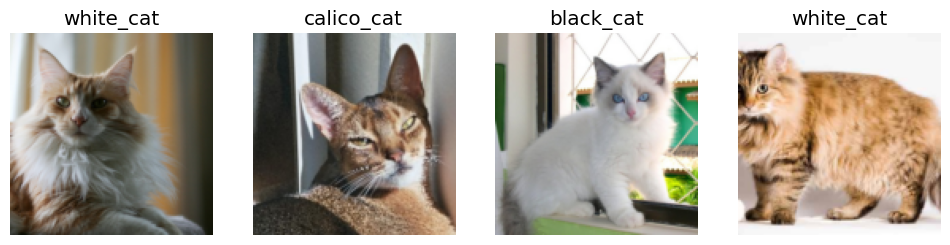

In [134]:
dls.valid.show_batch(max_n=4, nrows=1)

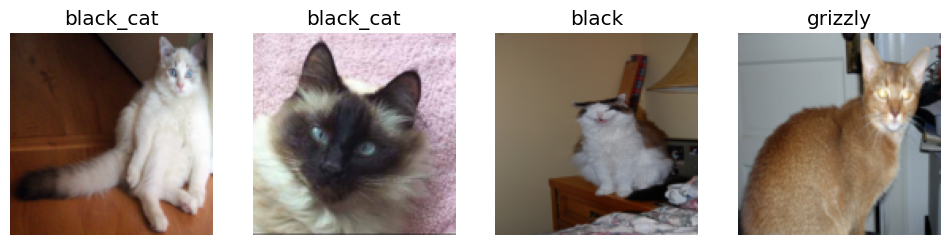

In [124]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(new_path)
dls.valid.show_batch(max_n=4, nrows=1)

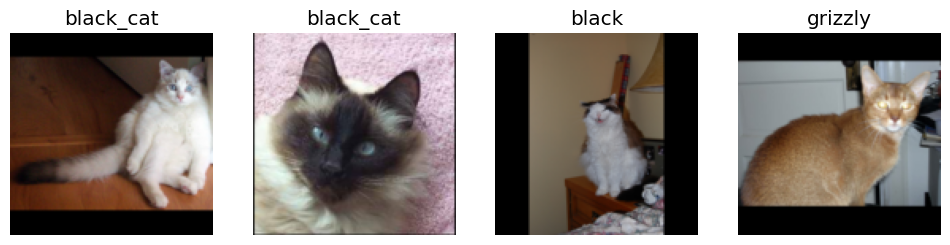

In [126]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(new_path)
dls.valid.show_batch(max_n=4, nrows=1)

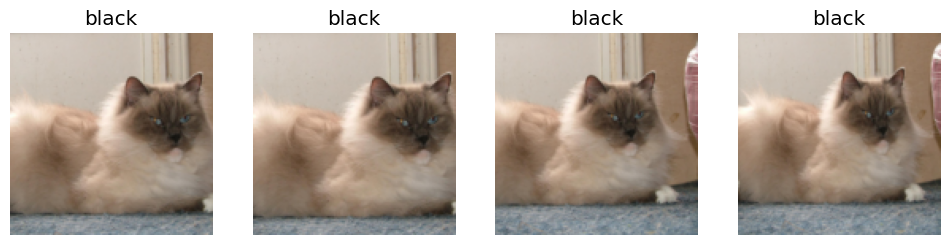

In [127]:
bears = bears.new(item_tfms = RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(new_path)
dls.train.show_batch(max_n = 4, nrows = 1, unique = True)

## Tăng cường dữ liệu 
Đề cập đến việc tạo ra các biến thể ngẫu nhiên của dữ liệu đầu vào của chugns, sao cho chúng xuất hiện khác nhua, nhưng không thực sự thay đổi ý nghĩa của dữ liệu.
Ví dụ: các kỹ thuật tăng cường dữ liệu cho hình ảnh là xoay vòng, lật, thay đổi độ sáng và thay đổi độ tương phản. 

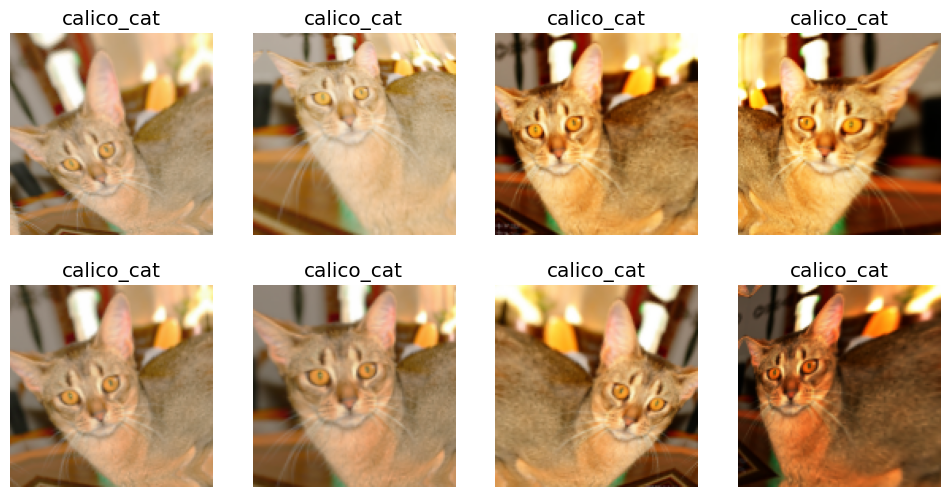

In [135]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(new_path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# Training Model 

Phân biệt RandomResizedCrop và aug_tranforms
+ RandoResizedCrop là một phép biến đổi cấp độ mục được pá dụng riêng lẻ cho từng ảnh trước khi đưa vào batch. 
 - Thực hiện 1 số thao tác như là: Cắt một phần ngẫu nhiên của ảnh với kích thước và vị trí được chọn ngẫu nhiên. 
 - Thay đổi kích thước của ảnh về kích thước cố định. 
 Chuẩn hóa để phù hợp với đầu vào của mô hình (vd: yêu cầu ảnh vuông)
 Tăng cường dữ liệu bằng cách chọn các vùng ngẫu nhiên, giúp mô hình học các đặc trưng tổng quát hơn
 Hạn chế : Chỉ áp dụng một loại biến đổi, không bao gồm các hiệu ứng như xoay, lật, thay đổi ánh sáng; mất một số phần nội dung của ảnh do cắt ngẫu nhiên, có thể không phù hợp nếu toàn bộ ảnh quan trọng. 
+ aug_tranforms: là một hàm của fastai tạo ra một tập hwoj các phép biến đổi cấp batch, được áp dụng đồng thời cho toàn bộ batch ảnh. Tăng cường nhiều loại dữ liệu. 
 - Tăng cường dữ liệu bằng cách áp dụng nhiều phép biến đổi ngẫy nhiên, giúp mô hình tổng quát hóa tốt hơn và giảm quá khớp. 
 - Được thiết kế chạy trên GPU, tối ưu hóa hiệu suất khi xử lý batch lớn. 
 Hạn chế: Không thay đổi kích thước ban đầu, cần kết hợp với RandomResizedCrop; có thể tăng độ khó học nếu mult quá cao. 

In [136]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(new_path)
     

In [138]:
print(dls.vocab)  # Xem có bao nhiêu lớp nhãn
print(len(dls.train_ds), len(dls.valid_ds))  # Số lượng ảnh train và valid


['black_cat', 'calico_cat', 'white_cat']
361 90


In [139]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.647070,0.777836,0.288889,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.428428,0.227372,0.077778,00:19
1,0.292785,0.164156,0.033333,00:30
2,0.245165,0.150869,0.022222,00:35
3,0.210044,0.145022,0.022222,00:36


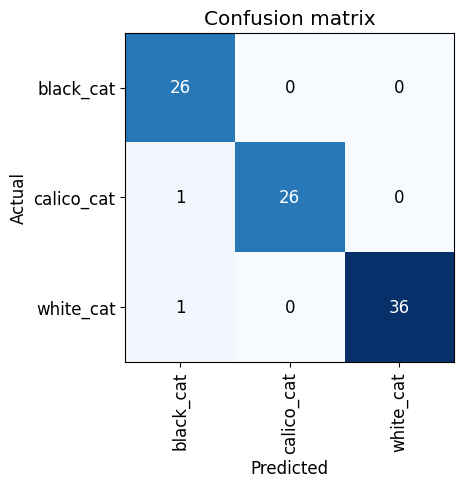

In [140]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

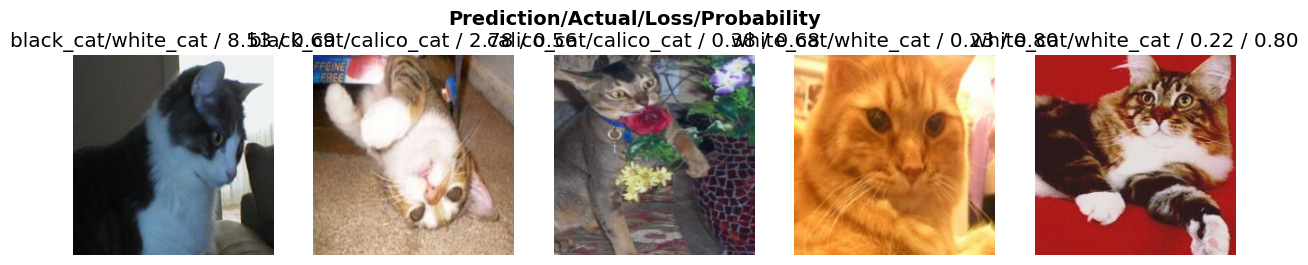

In [141]:
interp.plot_top_losses(5, nrows=1)

In [142]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [143]:
learn.export()

In [144]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [145]:
learn_inf = load_learner(path/'export.pkl')

C:\Users\doy27\AppData\Roaming\Python\Python312\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [146]:
learn_inf.predict('images/grizzly.jpg')

('calico_cat', tensor(1), tensor([2.3435e-04, 6.3031e-01, 3.6945e-01]))

In [147]:
learn_inf.dls.vocab

['black_cat', 'calico_cat', 'white_cat']

In [148]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [149]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [150]:
img = PILImage.create(btn_upload.data[-1])

In [151]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [152]:

pred,pred_idx,probs = learn_inf.predict(img)

In [153]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred
     

Label(value='Prediction: calico_cat; Probability: 0.6303')

In [154]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run
     

Button(description='Classify', style=ButtonStyle())

IndexError: list index out of range

In [155]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [156]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [157]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [158]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
    --------------------------------------- 0.1/4.5 MB 1.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/4.5 MB 2.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.5/4.5 MB 3.3 MB/s eta 0:00:02
   ------ --------------------------------- 0.7/4.5 MB 3.8 MB/s eta 0:00:02
   -------- ------------------------------- 0.9/4.5 MB 3.6 MB/s eta 0:00:01
   ---------- ----------------------------- 1.2/4.5 MB 4.0 MB/s eta 0:00:01
   ------------ --------------------------- 1.5/4.5 MB 4.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.8/4.5 MB 4.6 MB/s eta 0:00:01
   ------------------- -------------------- 2.2/4.5 MB 4.9 MB/s eta 0:00:01
   --------------------- ------------------ 2.5/4.5 MB 5.1 MB/s eta 0:00:01
   ---------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-se